### IDs:
Insert yours IDs to the cell below

ID #1: 807067 

ID #2: 206260762


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration (NOX). describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.datasets import load_boston

In [2]:
warnings.filterwarnings('ignore')
# print(load_boston()['DESCR'])

In [3]:
feat_df = pd.DataFrame(data=load_boston()['data'], columns=load_boston()['feature_names'])
feat_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The dataset contains real house prices in Boston from 1978. The full description can be found by calling `print(load_boston()['DESCR'])`

In [4]:
print(f'As can be seen below, we have {len(feat_df)} samples and {len(feat_df.columns)} features, all of type float64.')

As can be seen below, we have 506 samples and 13 features, all of type float64.


In [5]:
feat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


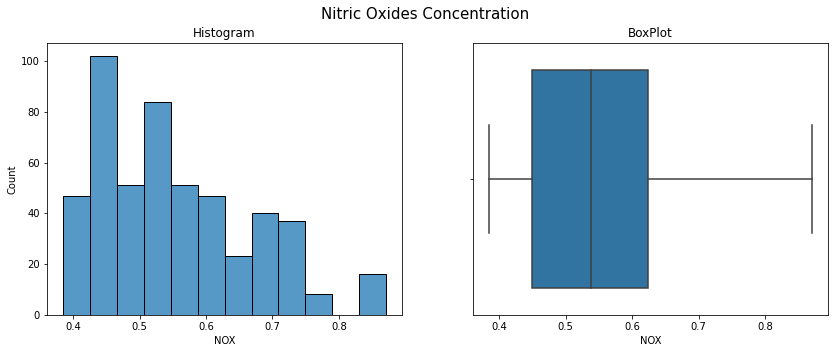

In [6]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(feat_df, x='NOX', ax=ax[0])
sns.boxplot(data=feat_df, x='NOX', ax=ax[1])
plt.suptitle('Nitric Oxides Concentration', size=15)
ax[0].set_title('Histogram')
ax[1].set_title('BoxPlot');

3. We produce a correlation matrix of all features:

In [7]:
corr_matrix = feat_df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [8]:
#method to find highest positive and negative correlations
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
print(sol.head(),'\n\n',sol.tail())

RAD    TAX    0.910228
INDUS  NOX    0.763651
NOX    AGE    0.731470
INDUS  TAX    0.720760
NOX    TAX    0.668023
dtype: float64 

 ZN     AGE     -0.569537
RM     LSTAT   -0.613808
INDUS  DIS     -0.708027
AGE    DIS     -0.747881
NOX    DIS     -0.769230
dtype: float64


Though it might be easier to spot high correlation visually. The following heatmap implies a strong positive connection between the property tax rate (TAX) and the accessibility to radial highways (RAD). We also have high correlation between the proportion of non-retail business acres per town (INDUS) and  nitric oxides concentration (NOX).

As for high negative correlations, one can easily spot them by looking at the blue squares.

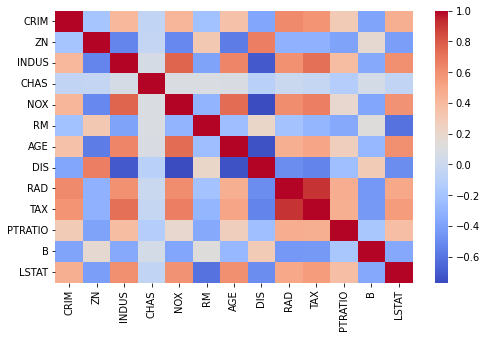

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(feat_df.corr(), cmap='coolwarm');

As for the unusual variable, the Charles river (CHARS) doesn't seem to correlate with the other variables.

We proceed to plot the relations between the most correlated features:

In [10]:
print(feat_df.corr().loc['TAX','RAD'])
print(feat_df.corr().loc['NOX', 'DIS'])

0.9102281885331865
-0.7692301132258282


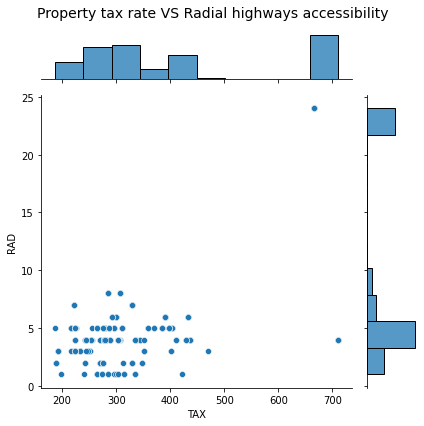

In [11]:
sns.jointplot(x='TAX',y='RAD',data=feat_df)
plt.suptitle('Property tax rate VS Radial highways accessibility', size=14)
plt.tight_layout()

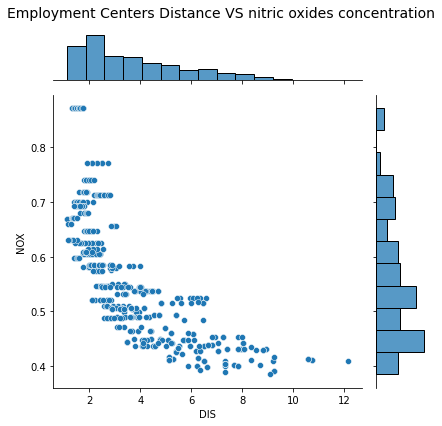

In [12]:
sns.jointplot(x='DIS',y='NOX',data=feat_df)
plt.suptitle('Employment Centers Distance VS nitric oxides concentration', size=14)
plt.tight_layout()

Consider the following cumulative histogram of the "Age" variable.

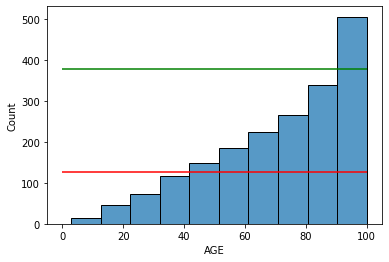

In [13]:
sns.histplot(x='AGE', data=feat_df, cumulative=True)
# plt.hlines(y=feat_df.AGE.quantile([0.25, 0.75]).values, xmin=[0,0], xmax=[100,100], colors=['r', 'g'])  # Age values
plt.hlines(y=pd.Series(feat_df.AGE.notnull().index).quantile([0.25,0.75]).values, xmin=[0,0], xmax=[100,100], colors=['r', 'g']);

An interesting thing to note in the data is the negative correlation between the distance to the employment centers (`DIS`), and the business acres per town (`INDUS`). Of course, if you happen to be closer to the employers centers, you probably have a high proportion of businesses in your town and vice versa. This can be shown in the scatter plot below.

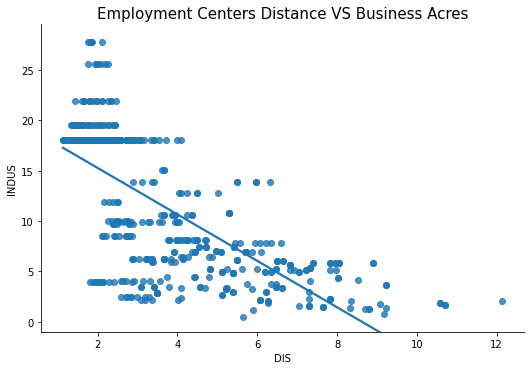

In [14]:
# plt.figure(figsize=(12,6))
sns.lmplot(x='DIS',y='INDUS',data=feat_df, order=1, ci=0, height=5, aspect=1.5)
plt.ylim(-1)
plt.title('Employment Centers Distance VS Business Acres', size=15);

Another interesting trend is the negative correlation between the lower status of the population (LSTAT) and the avg number of rooms per dwerling (RM).

In other words, a higher poverty rate implies houses with less rooms, which makes sense.

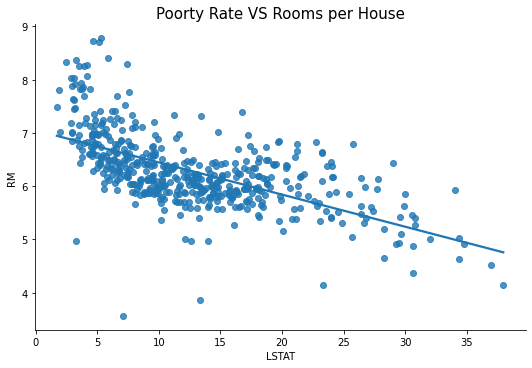

In [15]:
sns.lmplot(x='LSTAT',y='RM',data=feat_df, order=1, ci=0, height=5, aspect=1.5)
plt.title('Poorty Rate VS Rooms per House', size=15);

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

**Answer** - If we don't assume anything about the joint probabilty, we need to know each parameter of the form:
$$P\{X=x,Y=y,Z=z\}$$
but one, because they all must sum to 1. Hence, we need all different combinations (-1), namely $2mn-1$ parameters.

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

**Answer** - If they are independent, by knowing $p(x),p(y)$ and $p(z)$, we can calculate $p(x,y,z)$ as independence implies:
$$p(x,y,z)=p(x)p(y)p(z)$$
That being said, we need to know the parameters of these sets:
$$\{p(x)\mid x\in X\}, ~~~\{p(y)\mid y\in Y\}, ~~~\{p(z)\mid z\in Z\}$$

Because of the constraint mentioned in the last item, we need a total of $$(m-1)+(n-1)+(2-1)=n+m-1$$ parameters for $X,Y,Z$ independently. Then, we can compute every value in the joint distribution using them.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

**Answer** - In that case, every joint probability can be represented as:
$$p\left(x,y,z\right)=p\left(x,y\mid z\right)p\left(z\right)\underset{\text{cond.indp}}{=}p\left(x\mid z\right)p\left(y\mid z\right)p\left(z\right)$$
So we need (2-1) for $Z$ and (n-1) + (m-1) parameters given $Z=z$. As $k=2$, we need a total of:

$$(2-1)+2(n-1)+2(m-1)=2(m+n)-3$$
parameters.

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

**Answer** - Let $Z$ be $X+Y$. As $X,Y\sim \mathcal{N}(0,1)$, they are unconditionally independent. But they are not conditionally independent given $Z$, as we have:

$$0=f\left(X=0.5,Y=0.45\mid Z=1\right)\ne f\left(X=0.5\mid Z=1\right)f\left(Y=0.45\mid Z=1\right)>0$$

Explanation - If we know that $X+Y=1$, it's impossible to have ($X=0.5$ and $Y=0.45$). But, it is possible that $X=0.5$ or $Y=0.45$ independently given $X+Y=1$.

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [16]:
data = pd.read_csv('GMD_2021.csv', index_col=0, header=None)
mixture = data[1].values

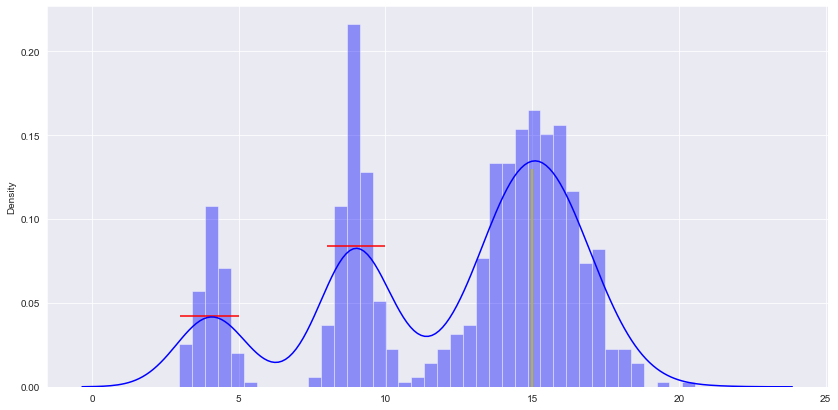

In [17]:
plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
sns.distplot(mixture, bins=40, color='b', )
plt.hlines(y=[0.042, 0.084], xmin=[3,8], xmax=[5,10], colors=['r', 'r'])
plt.vlines(x=15, ymin=0, ymax=0.13, color='y');

We have $X\sim GMM(\mu,\sigma^2)$ where:

In [18]:
print(f'GMM mean - {np.round(mixture.mean(),3)}')
print(f'GMM var - {np.round(mixture.std(),3)}^2')

GMM mean - 12.199
GMM var - 4.192^2


#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

**Answer** - First way is to simply look at the distplot above. Knowing that $\sigma_1=\sigma_2$, we would expect similar density around their means if they had equal weights. However, it seems like $X_2$ is about two times more dense than $X_1$. This can be verified with the red hlines plotted. That being said, a great guess would be $w_1=\frac{w_2}{2}=0.125$. 
This implies $w_3=1-w_1-w_2=0.625$ <br>
By looking at the plot above, it is easier to infer that $\mu_3\approx15$ using the yellow vline.

Second way - We know that:
$$12.2=E\left(X\right)=\sum_{i=1}^{3}w_{i}E\left(X_{i}\right)=w_{1}\mu_{1}+w_{2}\mu_{3}+w_{3}\mu_{3}=$$
$$4w_{1}+\frac{9}{4}+w_{3}\mu_{3}\underset{\Sigma w_{i}=1}{=}4\left(\frac{3}{4}-w_{3}\right)+\frac{9}{4}+w_{3}\mu_{3}=\frac{21}{4}+w_{3}\left(\mu_{3}-4\right)\Longrightarrow$$
$$w_{3}\left(\mu_{3}-4\right)=\frac{139}{20}\approx 7$$

We continue by expanding $Var(X)$:
$$4.192^2=Var\left(X\right)=\sum_{i=1}^{3}w_{i}\sigma_{i}^{2}+\sum_{i=1}^{3}w_{i}\left(\mu_{i}-\mu\right)^{2}=$$
$$\frac{w_{1}}{4}+\frac{1}{4^{2}}+\frac{9w_{3}}{4}+w_{1}\left(4-12.2\right)^{2}+\frac{1}{4}\left(9-12.2\right)^{2}+w_{3}\left(\mu_{3}-12.2\right)^{2}\underset{\Sigma w_{i}=1}{\Rightarrow}$$
$$\frac{1}{4}\left(\frac{3}{4}-w_{3}+9w_{3}\right)+67.25\left(\frac{3}{4}-w_{3}\right)+w_{3}\mu_{3}^{2}-24.4w_{3}\mu_{3}+149w_{3}=14.95\Rightarrow$$
$$2w_{3}-67.25w_{3}+w_{3}\mu_{3}^{2}-24.4w_{3}\mu_{3}+149w_{3}=-35.675 \Rightarrow$$
$$w_{3}\left(\mu_{3}^{2}-24.4\mu_{3}+83.75\right)=-35.675$$

We now have 2 non-linear equations with two variables:
$$(1)~~~~~w_{3}\left(\mu_{3}-4\right)=\frac{139}{20}$$
$$(2)~~~~~w_{3}\left(\mu_{3}^{2}-24.4\mu_{3}+83.75\right)=-35.675$$
Let us solve for $\mu_3$ using division:
$$\frac{\mu_{3}^{2}-24.4\mu_{3}+83.75}{\mu_{3}-4}=-5.13\Rightarrow$$
$$\mu_{3}^{2}-19.27\mu_{3}+63.23=0\Rightarrow$$

$$\underbrace{\mu_{3_{1}}=15.075},~~\mu_{3_{2}}=4.194$$

Pluging $\mu_3=15.075$ to the first equation yields:
$$w_{3}=\frac{139}{20}\biggr{/}\left(15.075-4\right)=0.6275$$
We can ignore $\mu_{3_2}$ as it will yield an absurd weight.

Bonus (Third way) - EM using `sklearn`

In [19]:
from sklearn.mixture import GaussianMixture
gmix = GaussianMixture(n_components=3, n_init=10, covariance_type='spherical')
gmix.fit(data)

GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)

In [20]:
gmix.weights_

array([0.62479709, 0.25020291, 0.125     ])

In [21]:
gmix.means_.flatten()

array([15.10399633,  8.99843174,  4.08381061])

In [22]:
np.sqrt(gmix.covariances_)  # std's

array([1.49936989, 0.52615833, 0.46878988])

In [23]:
gmix.lower_bound_  # Likelihood

-2.3124841980208934

We choose to work with $u_3=15,w_1=0.125,w_3=0.625$ in the next section.

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

**Answer** - We know that:
$$f(X)=\sum_{i=1}^{3}w_{i}f\left(X_{i}\right)=\sum_{i=1}^{3}w_{i}\phi\left(X_{i}\right)$$
Even though $f$ accepts values in all $\mathbb{R}$, we choose to limit the graph 4 STD's away from the mean of the left and right gaussians ($X_1$ and $X_3$), using $\sigma_1$ and $\sigma_3$.

In [24]:
from scipy.stats import norm
mu_s = [4,9,15]
sig_s = [0.5,0.5,1.5]
X1, X2, X3 = (norm(mu, sig) for mu,sig in zip(mu_s, sig_s))

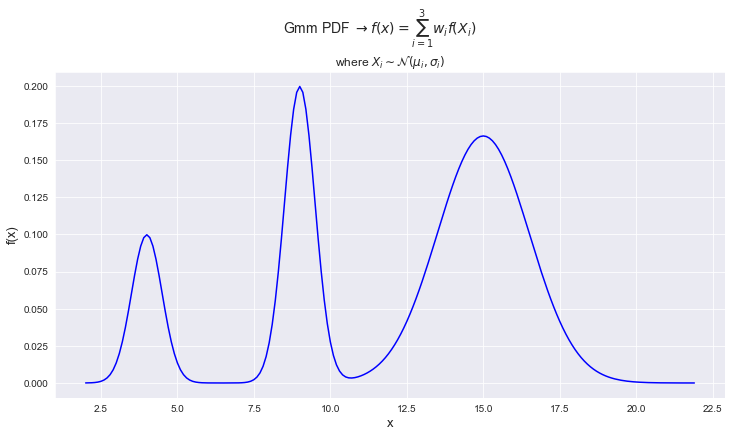

In [25]:
plt.figure(figsize=(12,6))
lims = np.arange(2, 22, 0.1)
mix_pdf = 0.125 * X1.pdf(lims) + 0.25 * X2.pdf(lims) + 0.625 * X3.pdf(lims)
sns.lineplot(x=lims, y=mix_pdf, color='b')
plt.suptitle(r'Gmm PDF $\rightarrow f(x)=\sum_{i=1}^{3}w_{i}f(X_i)$', size=14, y=1.03)
plt.title(r'where $X_i\sim\mathcal{N}\left(\mu_{i},\sigma_{i}\right)$', y=1, size=12)
plt.xlabel('x', size=13), plt.ylabel('f(x)', size=13);

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

**Answer:**
1. Using the mathematical way will fail, as we will have more than 2 equations to solve but still only 2 known variables.
2. Using the visual inference - might work. it depends on the parameters of $X_4$. If it happens to be far from the rest gaussians, we might be able to estimate them. It will be harder and less accurate though.
3. Using EM - should probably work, again the accuricy depends on $X_4$.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

**Answer**:
We begin by creating 3 seperate gaussians. then:
1. Create random variables with proportion to the weights and concatinate them. In this method we use  the weights as the real gaussian proportion in the mixture rather than the probability of being chosen.
2. Use the weights as probabilities by repeatedly appending a sample of $X_i$ to the mixture, only after he got chosen randomly with $p_i=w_i$.

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


Using method 1, we get the following result.
As they share the same variance and weights, we expect the mode of all 3 of them to be about the same height, just around a different mean. Keep in mind that this is relatively a small sample, thus this assumption is not guaranteed at all.

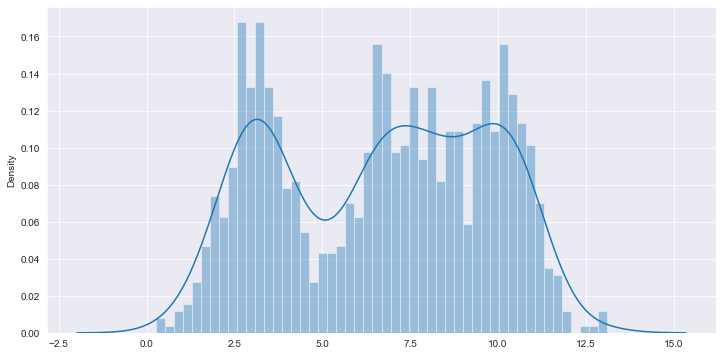

In [26]:
plt.figure(figsize=(12,6))
mu_s = [3,7,10]
X1, X2, X3 = (norm(mu, 1) for mu in mu_s)
data1 = np.concatenate([X1.rvs(333), X2.rvs(333), X3.rvs(334)])
sns.distplot(data1, bins=50);

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

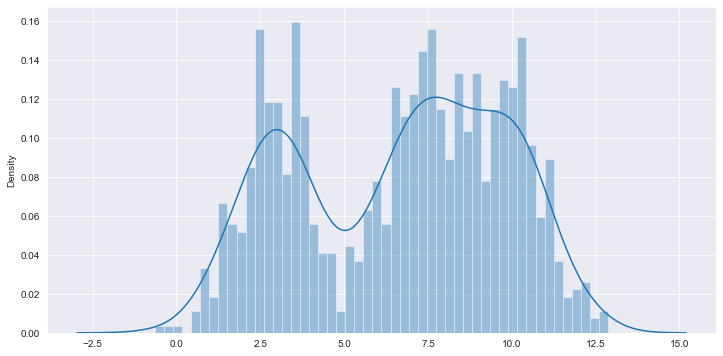

In [27]:
plt.figure(figsize=(12,6))
data2 = []
while len(data2) < 1000:
    data2.append(np.random.choice([X1.rvs(), X2.rvs(), X3.rvs()]))
sns.distplot(data2, bins=50);

Looking at both histograms, we can see similar results. Let us visualize that using a comparative histogram.

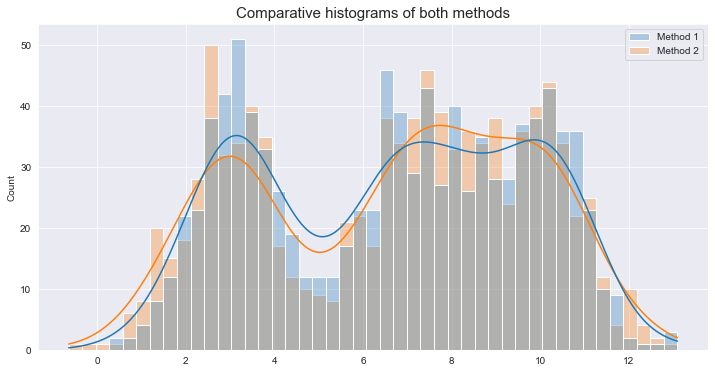

In [28]:
plt.figure(figsize=(12,6))
dists = pd.DataFrame({'Method 1':data1, 'Method 2':data2})
sns.histplot(dists, bins=45, kde=True, alpha=0.3)
plt.title('Comparative histograms of both methods', size=15);

It might seem like the first method has a clearer shape, that's probably because that method uses the real weights ("population" of the weights), while the second method uses probablities instead ("sample" of the weights).

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [29]:
from scipy.stats import norm
rv = norm(70000, 30000)

In [30]:
print(f'{np.round((rv.cdf(50000))*100, 2)}%')

25.25%


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [31]:
print(f'{np.round((rv.cdf(65000) - rv.cdf(45000))*100, 2)}%')

23.15%


#### 4.C
What percent of people earn more than 70,000 RCU?

In [32]:
print(f'{np.round((rv.sf(70000))*100, 2)}%')

50.0%


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [33]:
employees = 1000
np.rint(rv.sf(140000) * employees)

10.0

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [34]:
def coupon_e(n):
    return (n / np.arange(1, n+1)).sum()

In [35]:
coupon_e(100)

518.737751763962

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [36]:
def coupon_v(n):
    p_i = np.arange(1, n+1) / n
    return ((1 - p_i) / p_i**2).sum()

In [37]:
coupon_v(100)

15831.101250084967

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [38]:
from scipy.stats import geom

In [39]:
def coupon(N, k):
    '''Yields P(T_N > k)'''
    assert k >= N, 'k cannot be smaller than N'
    return 1 - convv(N, k).sum()

def convv(N, k, i=1):
    Ks = np.arange(k)
    Gi = geom(p=i/N, loc=-1)
    if i==N:
        return Gi.pmf(Ks)
    return np.convolve(Gi.pmf(Ks), convv(N, k, i+1))[:k-N+1]

In [40]:
print(f'{coupon(30, 60):.3%}')

99.402%


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

**Answer** - Chebyshev's inequality is a private case of Markov's inequality:
$$P\{X\ge a\}\le \frac{E[X]}{a},~~~\forall a>0$$
for the non-negative random variable $Y=|X-\mu|$. Hence:
$$P\{T_{30}>60\}=P\{T_{30}\ge 61\}\le\frac{E[T_{30}]}{61}$$

In [41]:
coupon_e(30)/61

1.9647477693051103

This result is meaningless because $P\in [0,1]$. Though, we didn't expect to get a helpful result as chebyshev provides a loose bound and the real probability is almost 1.

**Updated answer** - After asking in Piazza, it turns out that using chebyshev is a must. As we will get $\lambda <0$, we can get a lower bound for the probability using the following manipulations:

$$P\left\{ T_{30}>60\right\} =P\left\{ 60-\mu<T_{30}-\mu\right\} \ge P\left\{ 60-\mu<T_{30}-\mu<\mu-60\right\} =P\left\{ \left|T_{30}-\mu\right|<\mu-60\right\} \underset{\lambda>0}{\ge}1-\frac{V\left(T_{30}\right)}{\left(\mu-60\right)^{2}}$$
Hence the result:

In [42]:
1-(coupon_v(30) / (60 - coupon_e(30))**2)

0.6283935500524924